In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': [9,9]}, font_scale=1.2)

In [2]:
df_red = pd.read_csv("wineQualityReds.csv")index_col=_white = pd.read_csv("wineQualityWhites.csv")

# Data cleaning and preperation

In [9]:
df_red['color'] = 'red'
df_white['color'] = 'white'

In [10]:
df_red.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df_white.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [23]:
df = df_red.append(df_white)
df.drop('Unnamed: 0',axis= 1,inplace=True)

In [24]:
df.sample(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
4124,6.0,0.13,0.36,1.6,0.052,23.0,72.0,0.98974,3.10,0.50,11.5,7,white
3210,5.8,0.33,0.23,5.0,0.053,29.0,106.0,0.99458,3.13,0.52,9.0,5,white
3490,7.6,0.31,0.24,1.8,0.037,39.0,150.0,0.99130,3.05,0.44,11.8,7,white
1335,6.6,0.58,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6,red
930,7.7,0.17,0.52,5.9,0.017,21.0,84.0,0.99290,3.14,0.40,11.9,7,white


In [106]:
df.duplicated().any()

True

### Does Red or White wine receive better ratings?

In [36]:
df.groupby('color')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


<AxesSubplot:xlabel='quality', ylabel='count'>

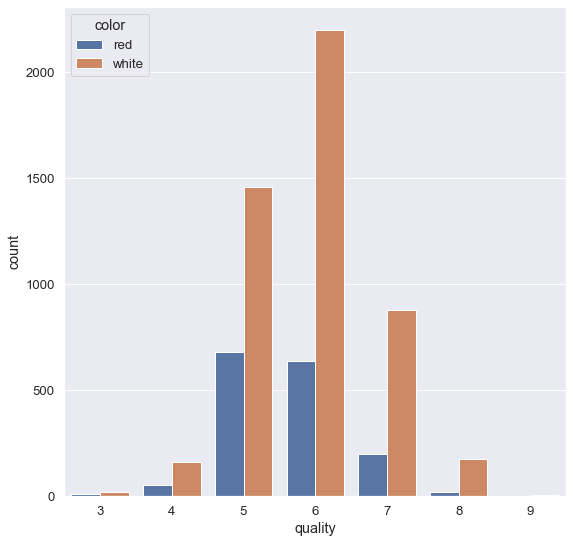

In [59]:
sns.countplot(x='quality',hue='color',data=df)

<font color = 'blue'>The Data contains a lot more white wine than red, we need to use proportions of data instead of counts
to get a better understanding</font>

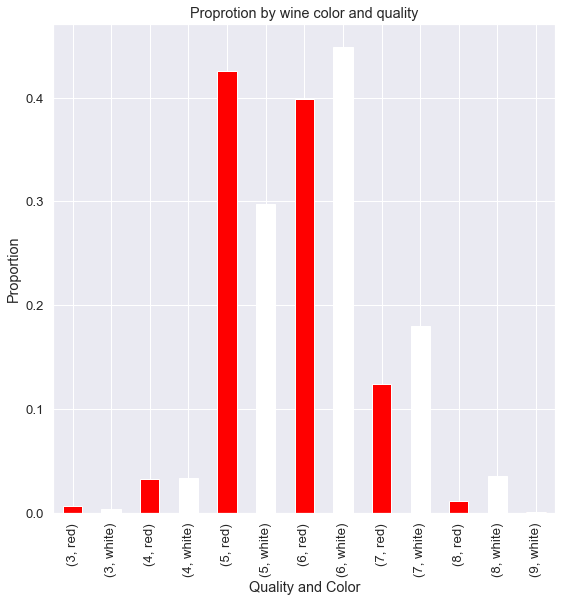

In [65]:
counts = df.groupby(['quality','color']).count()['pH']
totals = df.groupby('color').count()['pH']
proportions = counts / totals
proportions.plot(kind = 'bar',title = 'Proprotion by wine color and quality',color = ['red','white']);
plt.xlabel('Quality and Color')
plt.ylabel('Proportion');

<font color ='blue'>Note: Red wine seems to be slightly more favourable, but not by an considerable amount </font> 

# Is sweeter wine higher quality?

ValueError: cannot reindex from a duplicate axis

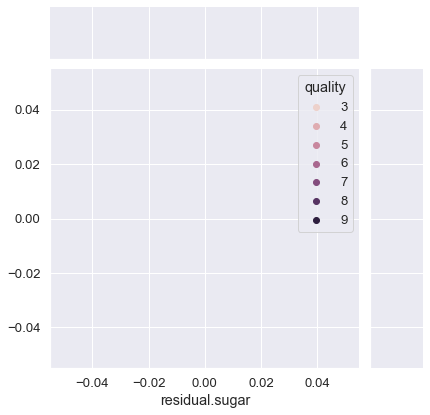

In [95]:
sns.jointplot(x='residual.sugar',hue='quality',data=df)

In [97]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
